# Utils: Compute and plot free energy surface

Authors: Ioannis Galdadas & Luigi Bonati

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/luigibonati/mlcolvar/blob/main/docs/notebooks/tutorials/utils_fes.ipynb)

In the following example we show how to use the function `compute_fes` from `mlcolvar.utils.fes` to calculate and visualize the free energy surface.

In [1]:
from mlcolvar.utils.plot import paletteFessa
from mlcolvar.utils.io import load_dataframe
from mlcolvar.utils.fes import compute_fes
import matplotlib.pyplot as plt
import numpy as np
 
# Load COLVAR file containing collective variables (and bias information)
colvar = load_dataframe('data/muller-brown/biased/opes-y/COLVAR')

# Simulations parameters
temperature = 300 
kb = 0.0083144621       # Boltzmann constant in kJ/(mol·K)
kbt = kb * temperature 

# note, for a toy model you should use directly kbt = temp
kbt = 1

Calculate statistical weights in case of a biased simulation (uncomment one of the options)

In [2]:
# (1) unbiased simulation
#bias = None

# (2) reweight for a single bias
bias = colvar['opes.bias'].values

# (3) reweight multiple bias potentials (e.g. OPES and harmonic walls)
#bias = colvar[['opes.bias','lwall.bias','uwall.bias']].sum(axis=1).values

# (4) reweight all field *.bias in the COLVAR
#bias = colvar.filter(regex='.bias').sum(axis=1).values

# calculate the weights
weights = np.exp( bias / kbt )

Calculate and plot 1d free energy surface

Text(0.5, 0, 'CV: p.x')

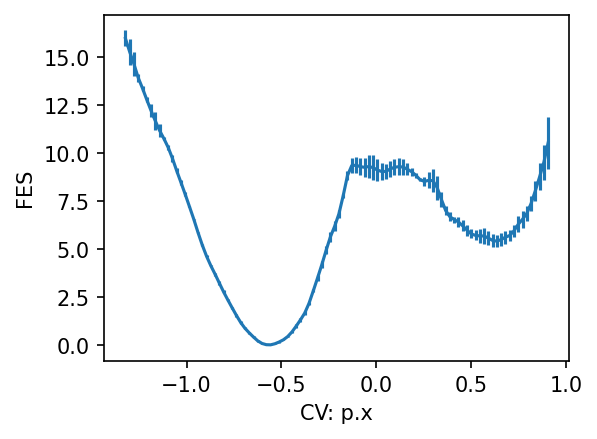

In [69]:
cv_name = 'p.x'
cv1 = colvar[cv_name].values

fes_params = {
    'blocks': 3,            # Number of blocks for error analysis
    'bandwidth': 0.01,      # Kernel bandwidth (sigma) for density estimation. if 'range', the bandwidth is expressed as ratio of the range of values (e.g. here it is 1% of it)
    'scale_by': 'range',    # Method to scale the bandwidth
    'kbt': kbt,             # Thermal energy for proper energy scaling
    'weights': weights,     # Statistical weights from the bias
}

fig, ax = plt.subplots(figsize=(4,3),dpi=150)
fes1D, grid1D, bounds1D, error1D,O,A = compute_fes(
    cv1,
    plot=True,
    ax = ax,
    **fes_params
)
ax.set_xlabel(f'CV: {cv_name}')

2D free energy surface

Adjusting regularization (eps) to 1.0e-13


/tmp/ipykernel_587268/3854778570.py:221: RuntimeWarning: divide by zero encountered in log
  * np.log(kde.evaluate(cartesian(pos)) + e)
/tmp/ipykernel_587268/3854778570.py:221: RuntimeWarning: invalid value encountered in log
  * np.log(kde.evaluate(cartesian(pos)) + e)
/tmp/ipykernel_587268/3854778570.py:221: RuntimeWarning: invalid value encountered in log
  * np.log(kde.evaluate(cartesian(pos)) + e)
/tmp/ipykernel_587268/3854778570.py:221: RuntimeWarning: invalid value encountered in log
  * np.log(kde.evaluate(cartesian(pos)) + e)


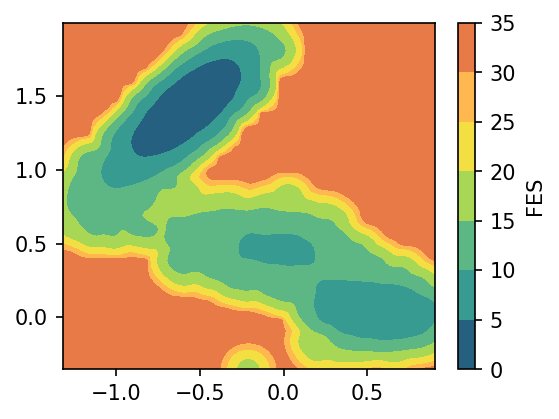

In [85]:
cv2d = colvar[['p.x', 'p.y']].values

# or equivalently
# cv1 = colvar['p.x'].values.squeeze()  
# cv2 = colvar['p.y'].values.squeeze()
# cv2d = np.stack((cv1, cv2)).transpose()

fes_params = {
    'blocks': 1,            # Number of blocks for error analysis
    'bandwidth': 0.015,     # Kernel bandwidth (sigma) for density estimation
    'scale_by': 'range',    # Method to scale the bandwidth. 
    'kbt': kbt,             # Thermal energy for proper energy scaling
    'weights': weights,     # Statistical weights from the bias
}

fig, ax = plt.subplots(figsize=(4,3),dpi=150)
fes2, grid2, bounds2, error2 , O_i, W_i= compute_fes(
    cv2d,
    ax = ax,
    plot=True,
    plot_max_fes=40,
    **fes_params
)